Demo Notebook for examples of FFT and Filtering with FFT in Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('seaborn-poster')
%matplotlib inline


As a first example, we will compute the DFT of function that is a combination of sines in the interval $[0,2\pi]$ 
$$f(x)=2*\sin{2x}+ 6*\sin{4x}+12*\sin{11x}$$


In [2]:
def sinesignal(x):    
  val = 2*np.sin(2*x)+6*np.sin(4*x)+12*np.sin(11*x)
  return val

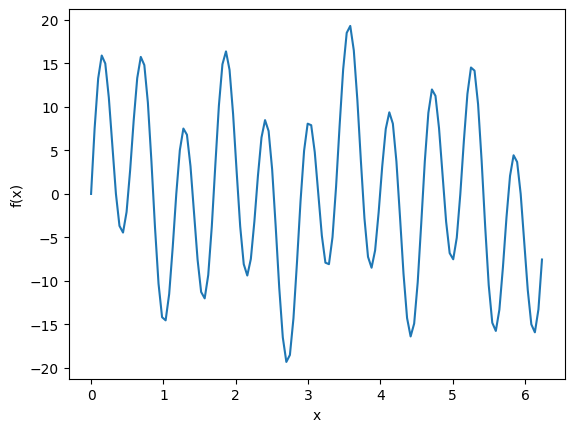

In [3]:
# plot the function on interval [0, 2pi]

L = 2*np.pi

N_grid = 2**7 # number of points in the grid

x2 = np.linspace(0, L, N_grid+1)
x = x2[0:N_grid]

#f = gaussian(x)
f=sinesignal(x)

# plotting f
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


We will now compute the DFT (using FFT) of this function $\hat{f}(x)$ and plot its real and imaginary parts. 

In [4]:
# plot complex valued function (real, imag, absmag) in a row
def plotcoeffs(x0,y0,val0,x1,y1,val1,x2,y2,val2):
    fig, (ax0, ax1,ax2) = plt.subplots(1,3, figsize=(15, 7))
    fig.tight_layout(pad=3.0)
    
    ax0.plot(x0, y0,val0)
    ax0.set_xlabel(r'$k$')
    ax0.set_ylabel(r'Re($FFT(f)$)')

    ax1.plot(x1, y1,val1)
    ax1.set_xlabel(r'$k$')
    ax1.set_ylabel(r'Im($FFT(f)$)')

    ax2.plot(x2, y2,val2)
    ax2.set_xlabel(r'$k$')
    ax2.set_ylabel(r'|$FFT(f)$|')

    return ax0, ax1, ax2

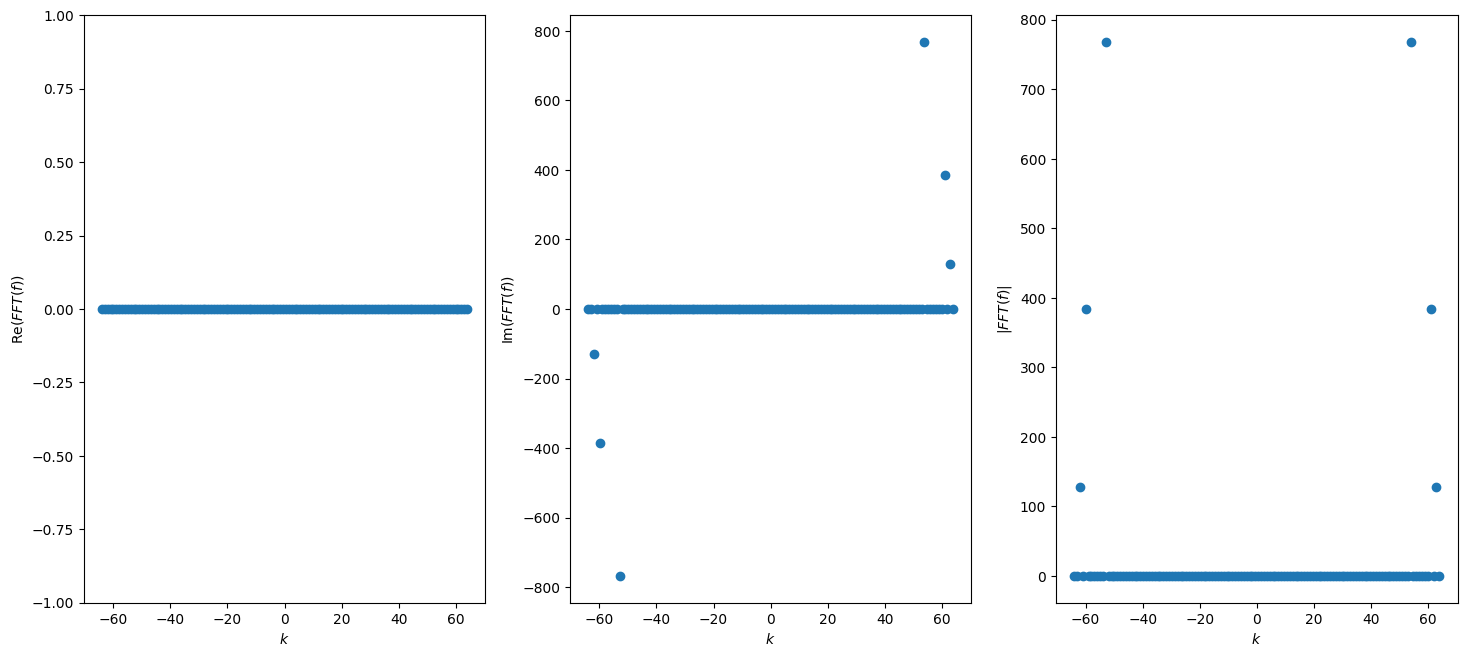

In [5]:
fhat = np.fft.fft(f)

# define vector k
k=np.linspace(- N_grid/2, N_grid/2, N_grid)

ax0, ax1, ax2 = plotcoeffs(k, fhat.real, 'o', k, fhat.imag,'o',k,np.abs(fhat),'o')
ax0.set_ylim(-1, 1)

plt.show()


That's not right. We expect to see nonzero coefficients at $k=2,4,11$. This is due to the fact that Numpy order the output frequencies like ([see manual](https://numpy.org/doc/stable/reference/routines.fft.html))
$$k \in (0, 1, 2, \dots, N/2-1, -N/2, -N/2+1, \dots, -1)$$
The 'fftshift' function fixes it.


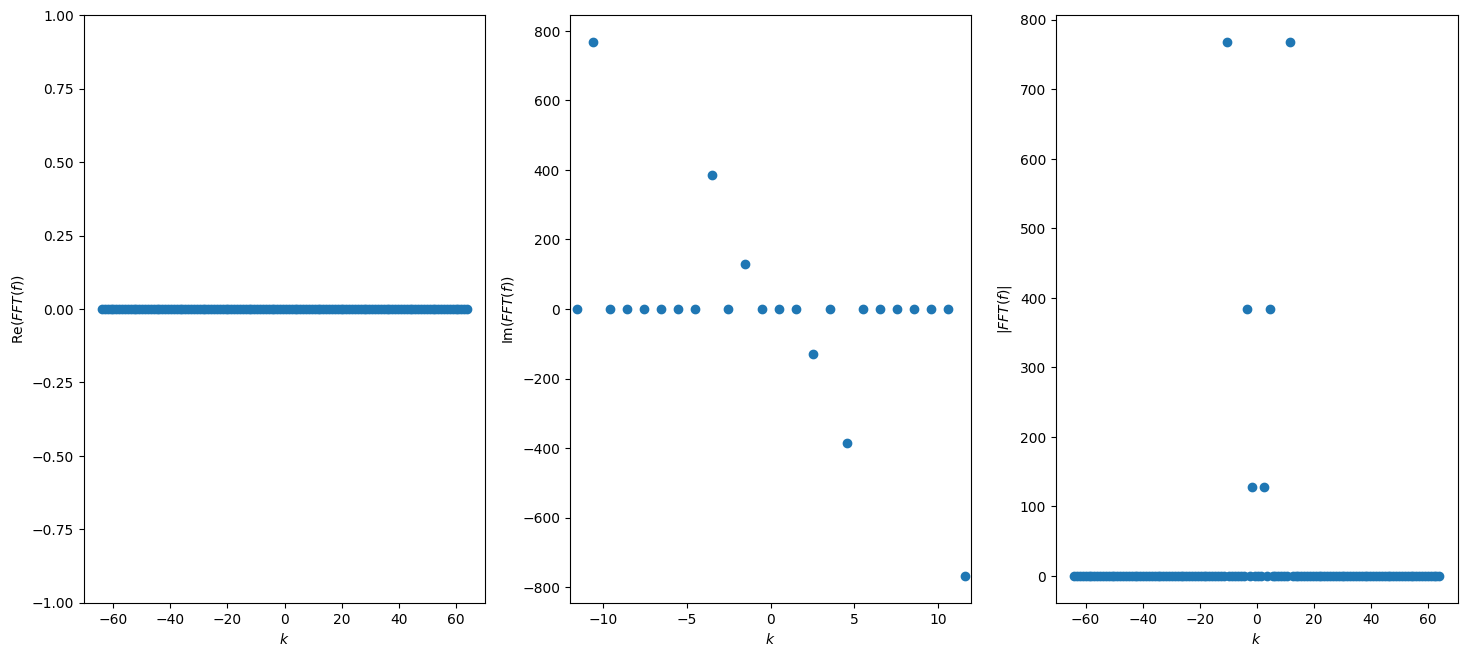

In [6]:
# the fftshift function fixes the issue with the peak amplitudes appearing at the wrong frequencies.

fhat_shifted = np.fft.fftshift(fhat)
ax0, ax1, ax2 = plotcoeffs(k, fhat_shifted.real, 'o', k, fhat_shifted.imag,'o',k,np.abs(fhat_shifted),'o')
ax0.set_ylim(-1, 1)
ax1.set_xlim(-12, 12)

plt.show()


There is another problem. The amplitudes of the coefficeints are not scaled correctly. We need to fix the scaling since Numpy puts 1/N scale in ifft vs fft. 

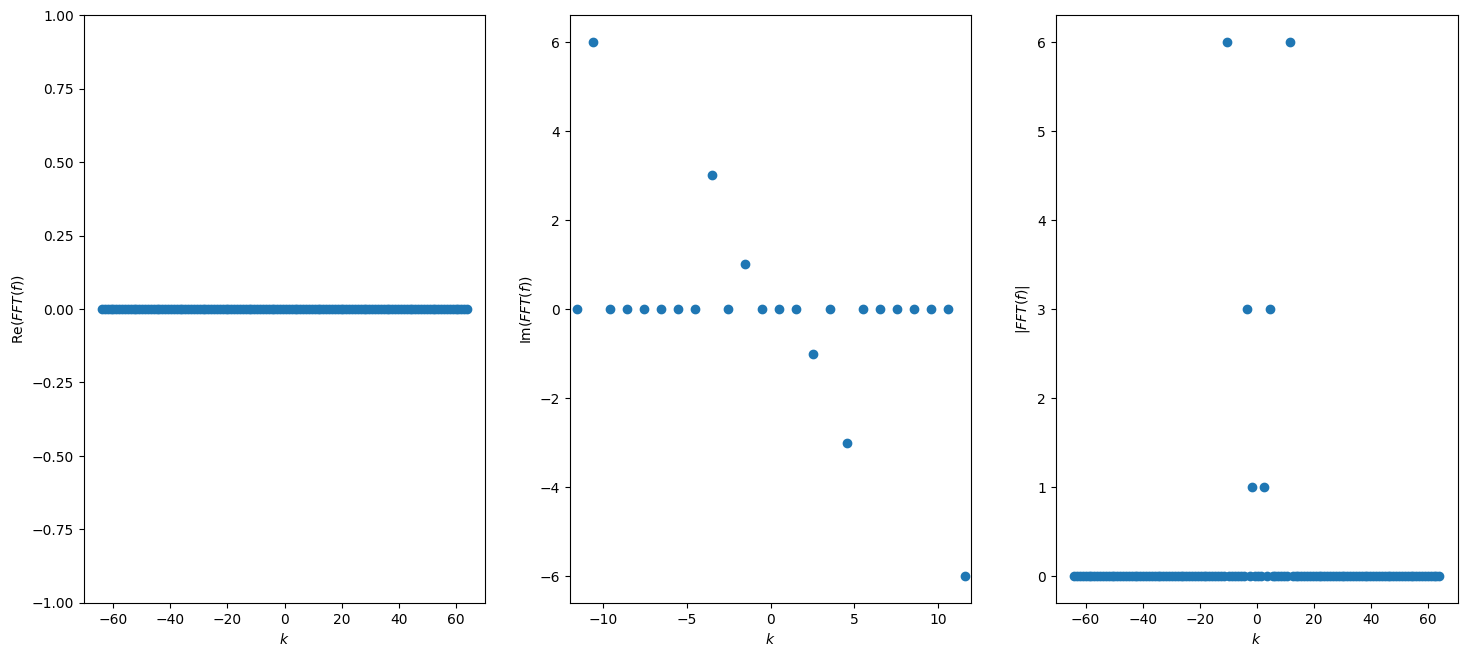

In [7]:
fhat_shifted_scaled = (1/N_grid)*fhat_shifted

ax0, ax1, ax2 = plotcoeffs(k, fhat_shifted_scaled.real, 'o', k, fhat_shifted_scaled.imag,'o',k,np.abs(fhat_shifted_scaled),'o')
ax0.set_ylim(-1, 1)
ax1.set_xlim(-12, 12)

plt.show()



Let us choose another example, the Gaussian function $g$:
$$g(x) = \exp{-{(x-\tau)}^2}$$

In [8]:
def gaussian(x):    
  val = np.exp(-(x-2)**2)
  return val

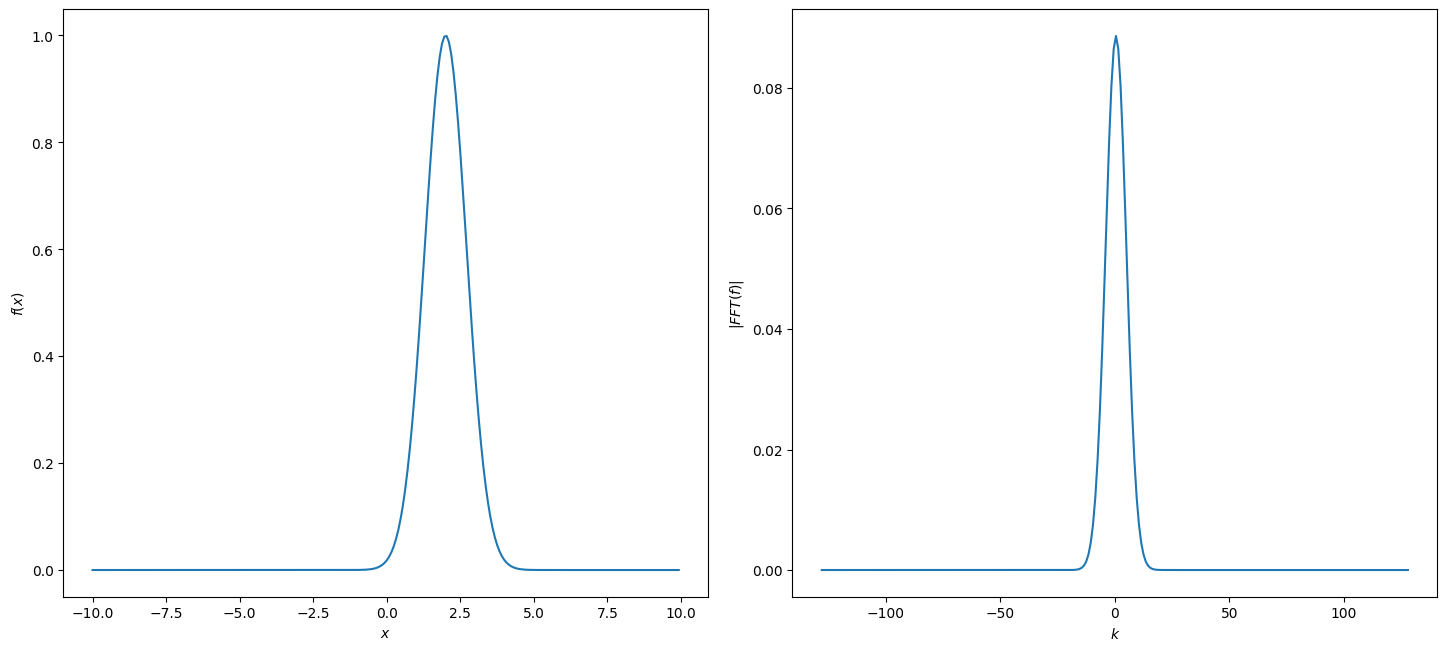

In [9]:
# Then we define the step function u and plot it
L = 10 
N_grid = 2**8 # number of points in the grid
x3 = np.linspace(-L, L, N_grid+1)
x = x3[0:N_grid]
k=np.linspace(- N_grid/2, N_grid/2, N_grid)


f = gaussian(x)

fhat = (1/N_grid)*np.fft.fftshift(np.fft.fft(f))

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 7))
fig.tight_layout(pad=3.0)
    
ax0.plot(x, f)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'$f(x)$')

ax1.plot(k, np.abs(fhat))
ax1.set_xlabel(r'$k$')
ax1.set_ylabel(r'|$FFT(f)$|')

plt.show()


Let us choose another example, the step function $u$.
$$u(x) = \left\{\begin{aligned}
&1  & -a \leq x \leq a\\
&0  & o.w.
\end{aligned}\right.$$

In [10]:
# we first define the heaviside function
def g(x,a): 
  return 1*(x >= a)

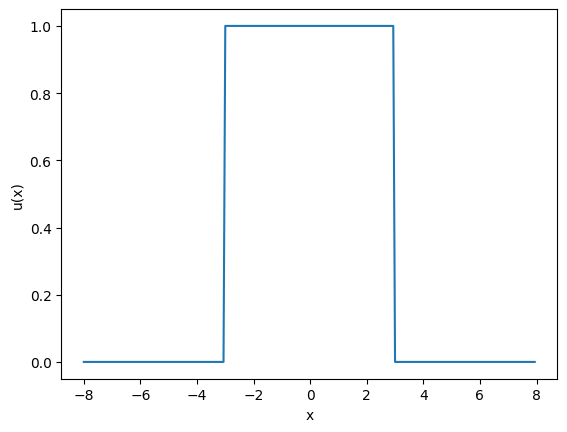

In [11]:

# Then we define the step function u and plot it
L = 8 

N_grid = 2**8 # number of points in the grid

x4 = np.linspace(-L, L, N_grid+1)
x = x4[0:N_grid]


u = g(x,-3)-g(x,3)

plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x)')

plt.show()


We now compute $\hat{u}_k$ the FFT of $u$. 

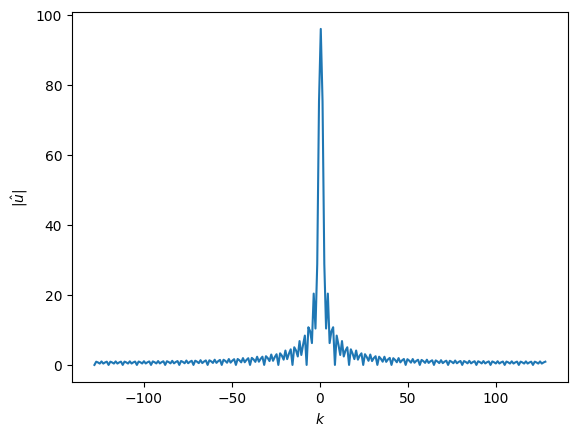

In [12]:
uhat = np.fft.fftshift(np.fft.fft(u))

k=np.linspace(- N_grid/2, N_grid/2, N_grid)


plt.plot(k, np.abs(uhat))
plt.xlabel(r'$k$')
plt.ylabel(r'$|\hat{u}|$')

plt.show()

We now construct a truncated (filtered) version of $u$ by defining $\hat{u}^m$ as 
$$\hat{u}^m_k = \left\{ \begin{aligned}
&\hat{u}_k &  |k| \le m \\ 
 &0 & |k| > m
\end{aligned}\right.$$

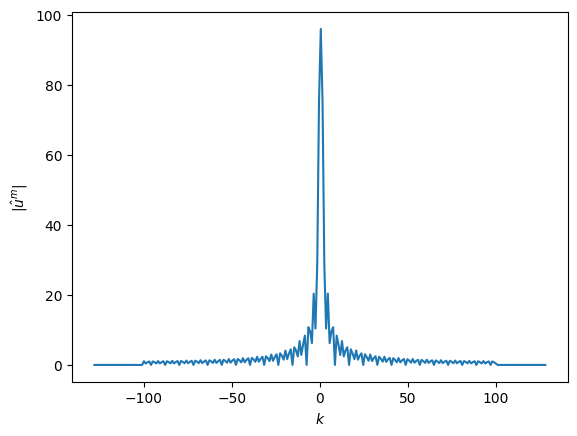

In [13]:
#filter = (np.abs(k) <= 50)
#filter = (np.abs(k) <= 10)
filter = (np.abs(k) <= 100)

filter =filter.astype(float)

u_fl_hat = filter*uhat

plt.plot(k, np.abs(u_fl_hat))
plt.xlabel(r'$k$')
plt.ylabel(r'$|\hat{u}^m|$')

plt.show()

Finally we get $u^m$ using the inverse fourier transform. 

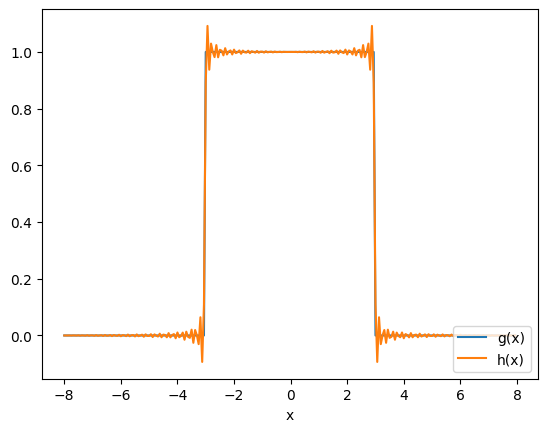

In [14]:
u_fl = np.fft.ifft( np.fft.ifftshift(u_fl_hat) )

u_fl = np.real(u_fl) # to get rid of negligble complex entries.

plt.plot(x, u, label="g(x)")
plt.plot(x, u_fl, label="h(x)")
plt.xlabel('x')
plt.legend(loc="lower right")
plt.show()

Modifying the signal in Fourier domain and then recovering it in the signal domain is called Filtering. As the name suggests, filtering can modify the signal by getting rid of frequencies that we do not expect in it, for example noise.

Let us demonstrate it with another example signal and gaussian noise (example by Prof. B. Hosseini).

We will study te following signal
$$f(x, s, k_1, k_2, l) = \exp \left( - \frac{x^2}{2 s^2} \right) \cos \left(\frac{\pi k_1x}{l}\right) + 0.25*\sin\left(\frac{\pi k_2 x}{l}\right) $$

In [15]:
def f(x,s, k1, k2, l):
  
  val = np.exp( - x**2/(2*s**2))*np.cos(k1*x*np.pi/l) + 0.25*np.sin(k2*x*np.pi/l)

  return val

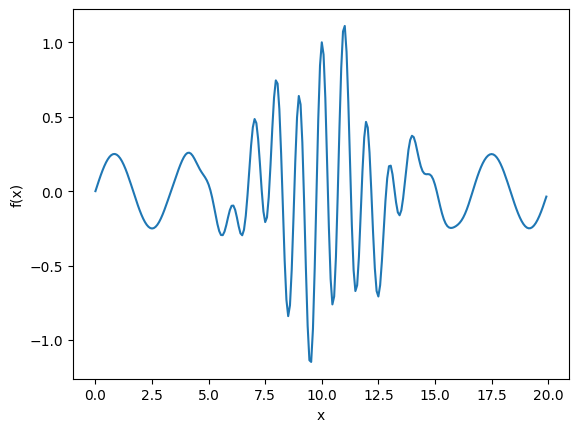

In [16]:
# plot the signal on interval [0, 2*L]

L = 10 

N_grid = 2**8 # number of points in the grid

grid = np.linspace(0, 2*L, N_grid+1)
grid = grid[0:N_grid]

s =2
k1 =20
k2 = 6

f_vals = f(grid - 10, s, k1, k2, L)

# plotting f

plt.plot(grid, f_vals)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

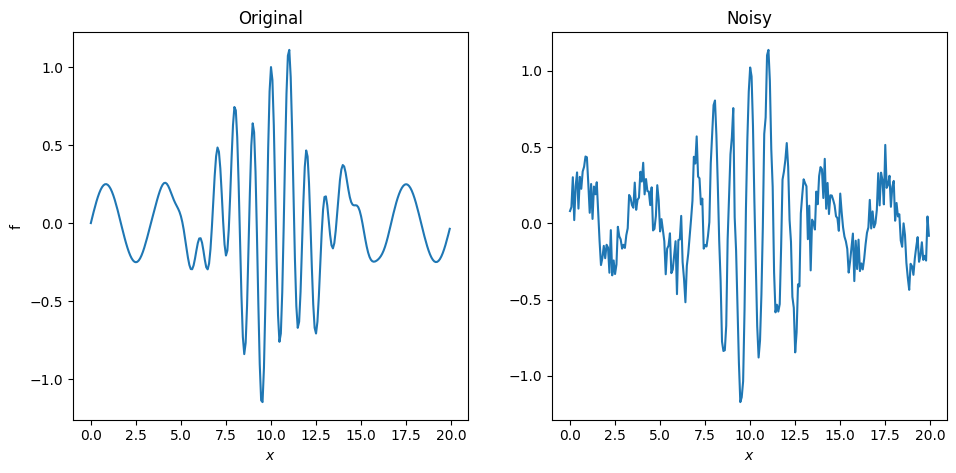

In [17]:
# Create noisy version of f

f_noisy_vals =  f_vals + 0.1*np.random.randn(N_grid)

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(10, 5))

fig.tight_layout(pad=3.0)

ax0.plot(grid, f_vals)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'f')
ax0.set_title('Original')

ax1.plot(grid, f_noisy_vals)
ax1.set_xlabel(r'$x$')
ax1.set_title('Noisy')

plt.show()

We now take the FFT of the noisy signal and define a Gaussian filter.

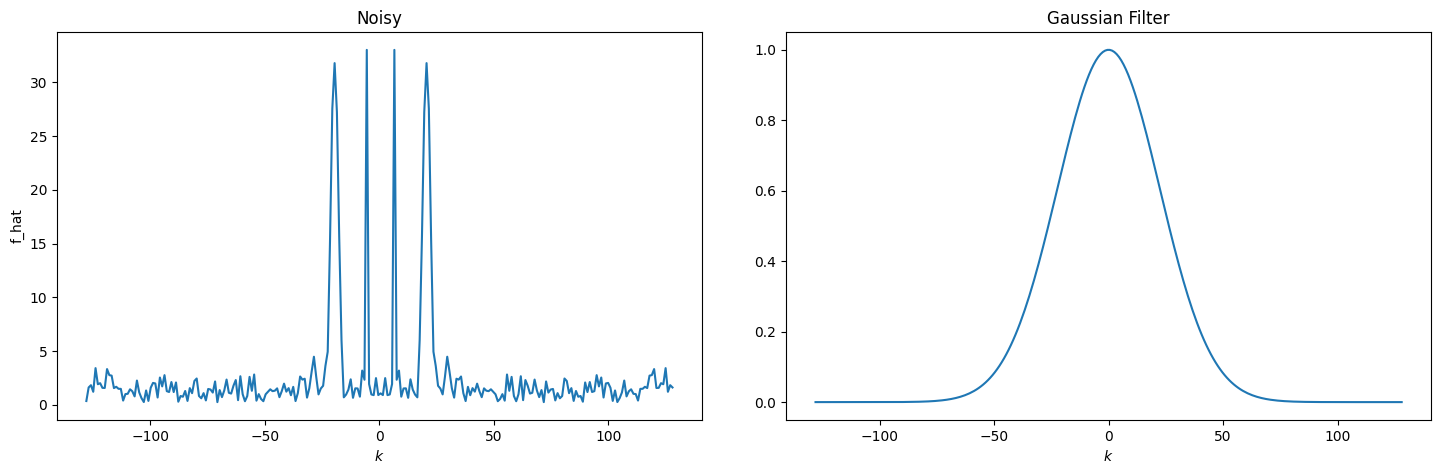

In [18]:
f_noisy_hat = np.fft.fftshift( np.fft.fft( f_noisy_vals))

freq_grid =np.linspace(- N_grid/2, N_grid/2, N_grid)

Gaussian_filter_vals = np.exp( - (0.001*freq_grid**2) )

fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15, 5))

fig.tight_layout(pad=3.0)

ax0.plot(freq_grid , np.abs(f_noisy_hat))
ax0.set_xlabel(r'$k$')
ax0.set_ylabel(r'f_hat')
ax0.set_title('Noisy')

ax1.plot(freq_grid, Gaussian_filter_vals)
ax1.set_xlabel(r'$k$')
ax1.set_title('Gaussian Filter')



plt.show()


Apply filter to FFT of noisy singal and reconstruct.

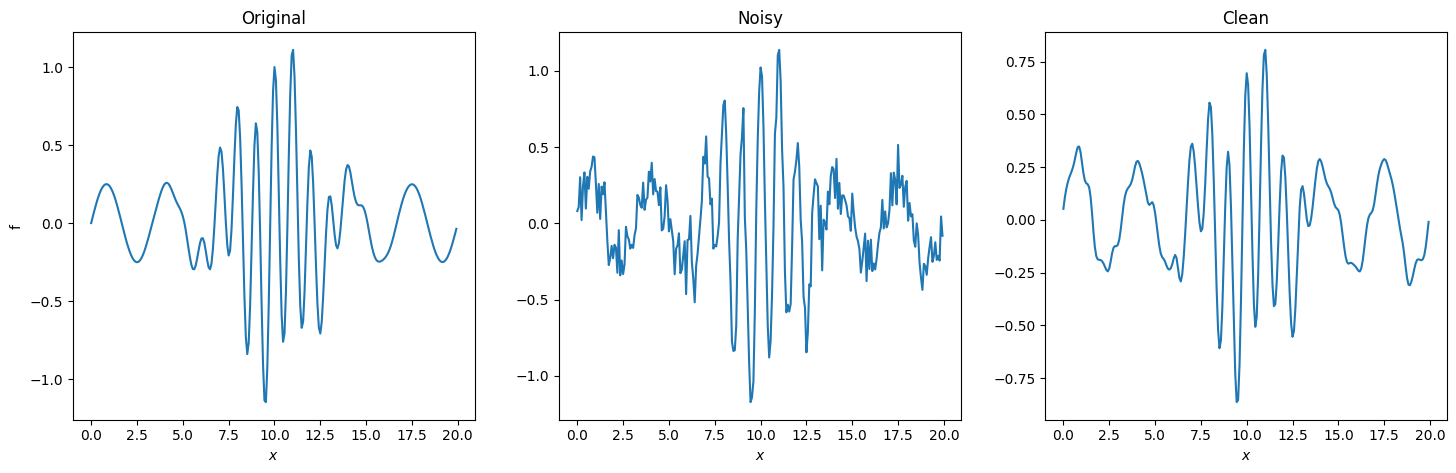

In [19]:
f_clean_vals = np.fft.ifft( np.fft.ifftshift( f_noisy_hat*Gaussian_filter_vals ) )

f_clean_vals = np.real(f_clean_vals)

fig, (ax0, ax1, ax2) = plt.subplots(1,3, figsize=(15, 5))

fig.tight_layout(pad=3.0)

ax0.plot(grid, f_vals)
ax0.set_xlabel(r'$x$')
ax0.set_ylabel(r'f')
ax0.set_title('Original')

ax1.plot(grid, f_noisy_vals)
ax1.set_xlabel(r'$x$')
ax1.set_title('Noisy')

ax2.plot(grid, f_clean_vals)
ax2.set_xlabel(r'$x$')
ax2.set_title('Clean')

plt.show()

In [ ]:
def print_argument(arg):
    print(arg)
    poem = """
    In the realm of code so bright,
    Where logic dances in the light,
    Arrays and functions take their flight,
    Transforming data, day and night.

    From sine waves to Gaussian peaks,
    Fourier's magic, answers seeks,
    Filtering noise, the signal tweaks,
    In Python's world, the coder speaks.
    """
    print(poem)